## Task 19 - Logistic Regression

In this task we use logistic regression to predict the classification of different species of Irises given the length and width of sepal and petals respectively. We then evaluate the effectiveness of the model by analysing the confusion matrix.

In [21]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Read the Iris dataset into a dataframe and inspect the first few entries.

In [22]:
file_path = 'Iris.csv'
df = pd.read_csv(file_path)

df.head()

# inspecting the output from .info() shows that there is no missing values
# df.info()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Pre-processing

Here we encode the target Species variable using LabelEncoder

We first analyse the binary problem. The following line of code ensures that both 'Iris-versicolour' and 'Iris-virginica' are encoded as 1, so that 0 corresponds to the 'Iris-setosa' class, and 1 corresponds to the
not-‘Iris-setosa' class.

To analyse the three-class problem simply comment out **df['Species'] = df['Species'].replace(2,1)** and re-run the whole notebook.

In [23]:
df= df.drop('Id', axis=1)
df['Species'] = LabelEncoder().fit_transform(df['Species'])

df.apply(LabelEncoder().fit_transform)

# To tackle the binary problem - 'Iris-versicolour' and 'Iris-virginica' are both encoded as 1. 
# To takle the three-class problem simply comment out the follwoing line and re-run the whole notebook.

df['Species'] = df['Species'].replace(2,1)

In [24]:
# code to show the correlations between the variables
# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=2)
# plt.show()

### Train test split

Split the data into a training and test set.

In [25]:
X = df.drop('Species', axis=1)
y = df['Species']

# note as it is a small dataset (150 observations) I choose to retain 40% (60 observations) for test purposes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Standardise the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementing the logistic regression model 

Use sklearn’s logistic regression function to fit a model

In [26]:
# Initialize the Logistic regression model
log_reg = LogisticRegression()

#Fit the logistic regression model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Make predictions on the test set.

In [27]:
# Use the model to make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

### Performance metrics

Here we use sklearn to generate a confusion matrix, which compares the
predicted labels to the actual labels (gold labels).

Given that the confusion matrix is symmetrical for the two-class problem, I would expect that the accuracy, precision and recall will be the same.

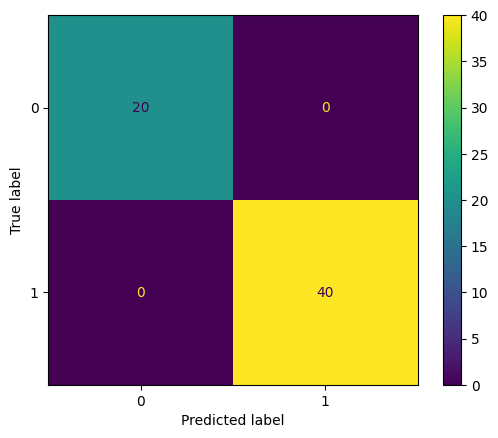

In [28]:
cm = confusion_matrix(y_pred, y_test, labels=log_reg.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_).plot()

Calculate the accuracy, precision and recall 

In [29]:
accuracy = np.trace(cm)/np.sum(cm)*100
precision = cm[0,0]/(cm[0,0]+cm[1,0])*100 #proportion of correct predictions of setosa vs all predictions of setosa
recall = cm[0,0]/(cm[0,0]+cm[0,1])*100 #proportion of correct predictions of setosa vs all actual cases of setosa

print(f'The accuracy of the logistic regression model is {accuracy:.2f}% \n')
print(f'For the Iris-Setosa species the precision of the logistic regression model is {precision:.2f}% \n')
print(f'For the Iris-Setosa species the recall of the logistic regression model is {recall:.2f}% \n')

The accuracy of the logistic regression model is 100.00% 

For the Iris-Setosa species the precision of the logistic regression model is 100.00% 

For the Iris-Setosa species the recall of the logistic regression model is 100.00% 



### Three-class species model

To repeat this task and study the three-class problem, re-run the code but comment out the 
'df['Species'] = df['Species'].replace(2,1)' code line in the pre-processing section.

Then we will have all three categories ‘Iris-setosa', 'Iris-versicolour', and 'Iris-virginica'
corresponding to the numeric values 0, 1, and 2 respectively.

In [30]:
# Evaluation for the three-class model

species = ['Setosa', 'Versicolor', 'Verginica']

species_label = 1  # this is the label of the species that we wish to evaluate the model for  
precision = cm[species_label,species_label]/(np.sum(cm,axis=0)[species_label])*100 #proportion of correct predictions vs all predictions
recall = cm[species_label,species_label]/(np.sum(cm,axis=1)[species_label])*100 #proportion of correct predictions vs all actual cases


print(f'The accuracy of the logistic regression model is {accuracy:.2f}% \n')
print(f'For the Iris-{species[species_label]} species the precision of the logistic regression model is {precision:.2f}% \n')
print(f'For the Iris-{species[species_label]} species the recall of the logistic regression model is {recall:.2f}% \n')

print("Classification report: \n", classification_report(y_pred,y_test))

The accuracy of the logistic regression model is 100.00% 

For the Iris-Versicolor species the precision of the logistic regression model is 100.00% 

For the Iris-Versicolor species the recall of the logistic regression model is 100.00% 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        40

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

